
AMAZON SALES EDA - PROFESSIONAL ANALYSIS

Data Analyst Portfolio Project


In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. DATA LOADING & INITIAL EXPLORATION


In [2]:
df = pd.read_csv(r'C:\Desktop\amazon-reviews-eda\data\raw\amazon.csv')
print("Shape:", df.shape)
print("\nColumns: ", df.columns)
print("\nInfo: ", df.info())


Shape: (1465, 16)

Columns:  Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 

2. DATA CLEANING PIPELINE

In [3]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [4]:
print("\nData types:\n", df.dtypes)


Data types:
 product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object


In [5]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [6]:
df.tail()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹2,219","₹3,080",28%,3.6,468,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...","₹1,399","₹1,890",26%,4,"8,031",Fan sweep area: 230 MM ; Noise level: (40 - 45...,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...","Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Havells-Ventilair-230mm-...
1464,B01486F4G6,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,863","₹3,690",22%,4.3,"6,987","Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...","AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...","Rajib,Ajay B,Vikas Kahol,PARDEEP,Anindya Prama...","R20RBRZ0WEUJT9,ROKIFK9R2ISSE,R30EEG2FNJSN5I,R2...","Works perfect,Ok good product,Nice Product. Re...",It does it job perfectly..only issue is temp c...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...


In [7]:
print("\nNUMERIC SUMMARY:")
df.describe()


NUMERIC SUMMARY:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B08WRWPM22,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [8]:
print("=== COLUMNS ANALYSIS FOR DROPPING ===")

for col in df.columns:
    unique_pct = df[col].nunique() / len(df) * 100
    null_pct = df[col].isnull().sum() / len(df) * 100
    
    print(f"{col:20} | Unique: {df[col].nunique():4} ({unique_pct:5.1f}%) | Null: {null_pct:5.1f}%")

=== COLUMNS ANALYSIS FOR DROPPING ===
product_id           | Unique: 1351 ( 92.2%) | Null:   0.0%
product_name         | Unique: 1337 ( 91.3%) | Null:   0.0%
category             | Unique:  211 ( 14.4%) | Null:   0.0%
discounted_price     | Unique:  550 ( 37.5%) | Null:   0.0%
actual_price         | Unique:  449 ( 30.6%) | Null:   0.0%
discount_percentage  | Unique:   92 (  6.3%) | Null:   0.0%
rating               | Unique:   28 (  1.9%) | Null:   0.0%
rating_count         | Unique: 1143 ( 78.0%) | Null:   0.1%
about_product        | Unique: 1293 ( 88.3%) | Null:   0.0%
user_id              | Unique: 1194 ( 81.5%) | Null:   0.0%
user_name            | Unique: 1194 ( 81.5%) | Null:   0.0%
review_id            | Unique: 1194 ( 81.5%) | Null:   0.0%
review_title         | Unique: 1194 ( 81.5%) | Null:   0.0%
review_content       | Unique: 1212 ( 82.7%) | Null:   0.0%
img_link             | Unique: 1412 ( 96.4%) | Null:   0.0%
product_link         | Unique: 1465 (100.0%) | Null:   0.0%


2.1 Drop irrelevant columns

In [9]:
df2 = df.drop(['product_id', 'user_id', 'review_id', 'img_link', 'product_link', 
               'user_name', 'about_product', 'review_title', 'review_content'], 
              axis=1)

In [10]:
print("dimension After drop:\n", df2.shape)
print("\nInfo After drop:", df2.info())

dimension After drop:
 (1465, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_name         1465 non-null   object
 1   category             1465 non-null   object
 2   discounted_price     1465 non-null   object
 3   actual_price         1465 non-null   object
 4   discount_percentage  1465 non-null   object
 5   rating               1465 non-null   object
 6   rating_count         1463 non-null   object
dtypes: object(7)
memory usage: 80.2+ KB

Info After drop: None


In [11]:
print("first 5 rows:", df2.head())

first 5 rows:                                         product_name  \
0  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  Sounce Fast Phone Charging Cable & Data Sync U...   
3  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  
0       ₹1,099                 64%    4.2       24,269  
1         ₹349                 43%    4.0       43,994  
2       ₹1,899                 90%    3

In [12]:
df2["discounted_price"]

0         ₹399
1         ₹199
2         ₹199
3         ₹329
4         ₹154
         ...  
1460      ₹379
1461    ₹2,280
1462    ₹2,219
1463    ₹1,399
1464    ₹2,863
Name: discounted_price, Length: 1465, dtype: object

In [13]:
df2["actual_price"]

0       ₹1,099
1         ₹349
2       ₹1,899
3         ₹699
4         ₹399
         ...  
1460      ₹919
1461    ₹3,045
1462    ₹3,080
1463    ₹1,890
1464    ₹3,690
Name: actual_price, Length: 1465, dtype: object

In [14]:
df2["discount_percentage"]

0       64%
1       43%
2       90%
3       53%
4       61%
       ... 
1460    59%
1461    25%
1462    28%
1463    26%
1464    22%
Name: discount_percentage, Length: 1465, dtype: object

In [15]:
df2['rating']

0       4.2
1       4.0
2       3.9
3       4.2
4       4.2
       ... 
1460      4
1461    4.1
1462    3.6
1463      4
1464    4.3
Name: rating, Length: 1465, dtype: object

In [16]:
df2['rating'].value_counts()

rating
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
3.0      3
4.8      3
5.0      3
2.8      2
3.2      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: count, dtype: int64

In [17]:
df2.query('rating =="|"')

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count
1279,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...","₹2,099","₹2,499",16%,|,992


In [18]:
df2['rating_count']

0       24,269
1       43,994
2        7,928
3       94,363
4       16,905
         ...  
1460     1,090
1461     4,118
1462       468
1463     8,031
1464     6,987
Name: rating_count, Length: 1465, dtype: object

2.2 Clean & convert data types

In [19]:
df2["discounted_price"] = df2['discounted_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype('float64')
df2["actual_price"] = df2['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype('float64')
df2["discount_percentage"] = df2['discount_percentage'].astype(str).str.replace('%','').astype('float64')/100
df2["rating"] = df2['rating'].astype(str).str.replace('|','4.0').astype('float64')
df2["rating_count"] = df2['rating_count'].astype(str).str.replace(',','').astype('float64')

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_name         1465 non-null   object 
 1   category             1465 non-null   object 
 2   discounted_price     1465 non-null   float64
 3   actual_price         1465 non-null   float64
 4   discount_percentage  1465 non-null   float64
 5   rating               1465 non-null   float64
 6   rating_count         1463 non-null   float64
dtypes: float64(5), object(2)
memory usage: 80.2+ KB


2.3 Handle missing values


In [21]:
df2['rating_count'] = df2['rating_count'].fillna(df2['rating_count'].median())
print(df2.isnull().sum())

product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
dtype: int64


In [22]:
print(df2.describe().round(2))

       discounted_price  actual_price  discount_percentage   rating  \
count           1465.00       1465.00              1465.00  1465.00   
mean            3125.31       5444.99                 0.48     4.10   
std             6944.30      10874.83                 0.22     0.29   
min               39.00         39.00                 0.00     2.00   
25%              325.00        800.00                 0.32     4.00   
50%              799.00       1650.00                 0.50     4.10   
75%             1999.00       4295.00                 0.63     4.30   
max            77990.00     139900.00                 0.94     5.00   

       rating_count  
count       1465.00  
mean       18277.63  
std        42727.40  
min            2.00  
25%         1191.00  
50%         5179.00  
75%        17325.00  
max       426973.00  


2.4 Remove duplicates

In [23]:
print("Total duplicate rows:", df2.duplicated().sum())
duplicates = df2[df2.duplicated(keep=False)]
print("\nDuplicate rows found:")
print(duplicates.head())
print("Total duplicates:", len(duplicates))

Total duplicate rows: 90

Duplicate rows found:
                                        product_name  \
0  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
4  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
7             MI Usb Type-C Cable Smartphone (Black)   
9  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   
7  Computers&Accessories|Accessories&Peripherals|...             229.0   
9  Computers&Accessories|Accessories&Peripherals|...             199.0   

   actual_price  discount_percentage  rating  rating_count  
0        1099.0                 0.64     4.2       24269.0  
1         349.0                 0.43     4.0    

In [24]:
df_clean = df2.drop_duplicates(keep='first')
df_clean.duplicated().sum()

np.int64(0)

In [25]:
df_clean.to_csv('amazon_sales_clean_df2.csv', index=False)

In [26]:
print("df_clean SUMMARY:")
print(df_clean.describe().round(2))

df_clean SUMMARY:
       discounted_price  actual_price  discount_percentage   rating  \
count           1375.00       1375.00              1375.00  1375.00   
mean            3233.63       5577.18                 0.47     4.09   
std             7099.70      11095.67                 0.22     0.30   
min               39.00         39.00                 0.00     2.00   
25%              347.50        899.00                 0.31     3.90   
50%              873.00       1700.00                 0.49     4.10   
75%             2099.00       4499.50                 0.63     4.30   
max            77990.00     139900.00                 0.94     5.00   

       rating_count  
count       1375.00  
mean       18522.55  
std        43859.45  
min            2.00  
25%         1162.00  
50%         4959.00  
75%        17161.50  
max       426973.00  


2.5 Feature engineering

In [27]:
df_clean['profit'] = df_clean['actual_price'] - df_clean['discounted_price']
df_clean['profit_margin'] = df_clean['profit'] / df_clean['actual_price'] * 100
df_clean['main_category'] = df_clean['category'].str.split('|').str[0]
df_clean['popularity'] = df_clean['rating'] * df_clean['rating_count']

C:\Users\jeyaagastin\AppData\Local\Temp\ipykernel_18588\199015877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['profit'] = df_clean['actual_price'] - df_clean['discounted_price']
C:\Users\jeyaagastin\AppData\Local\Temp\ipykernel_18588\199015877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['profit_margin'] = df_clean['profit'] / df_clean['actual_price'] * 100
C:\Users\jeyaagastin\AppData\Local\Temp\ipykernel_18588\199015877.py:3: SettingWithCopyWarning: 
A value is trying to b

Category Analysis


In [28]:
# Extract main category
df_clean['main_category'] = df_clean['category'].str.split('|').str[0]

C:\Users\jeyaagastin\AppData\Local\Temp\ipykernel_18588\1485845198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['main_category'] = df_clean['category'].str.split('|').str[0]


In [29]:
cat_dist = df_clean['main_category'].value_counts().head(10)
print(cat_dist)

main_category
Electronics              500
Home&Kitchen             448
Computers&Accessories    389
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64


3. UNIVARIATE ANALYSIS - DISTRIBUTIONS

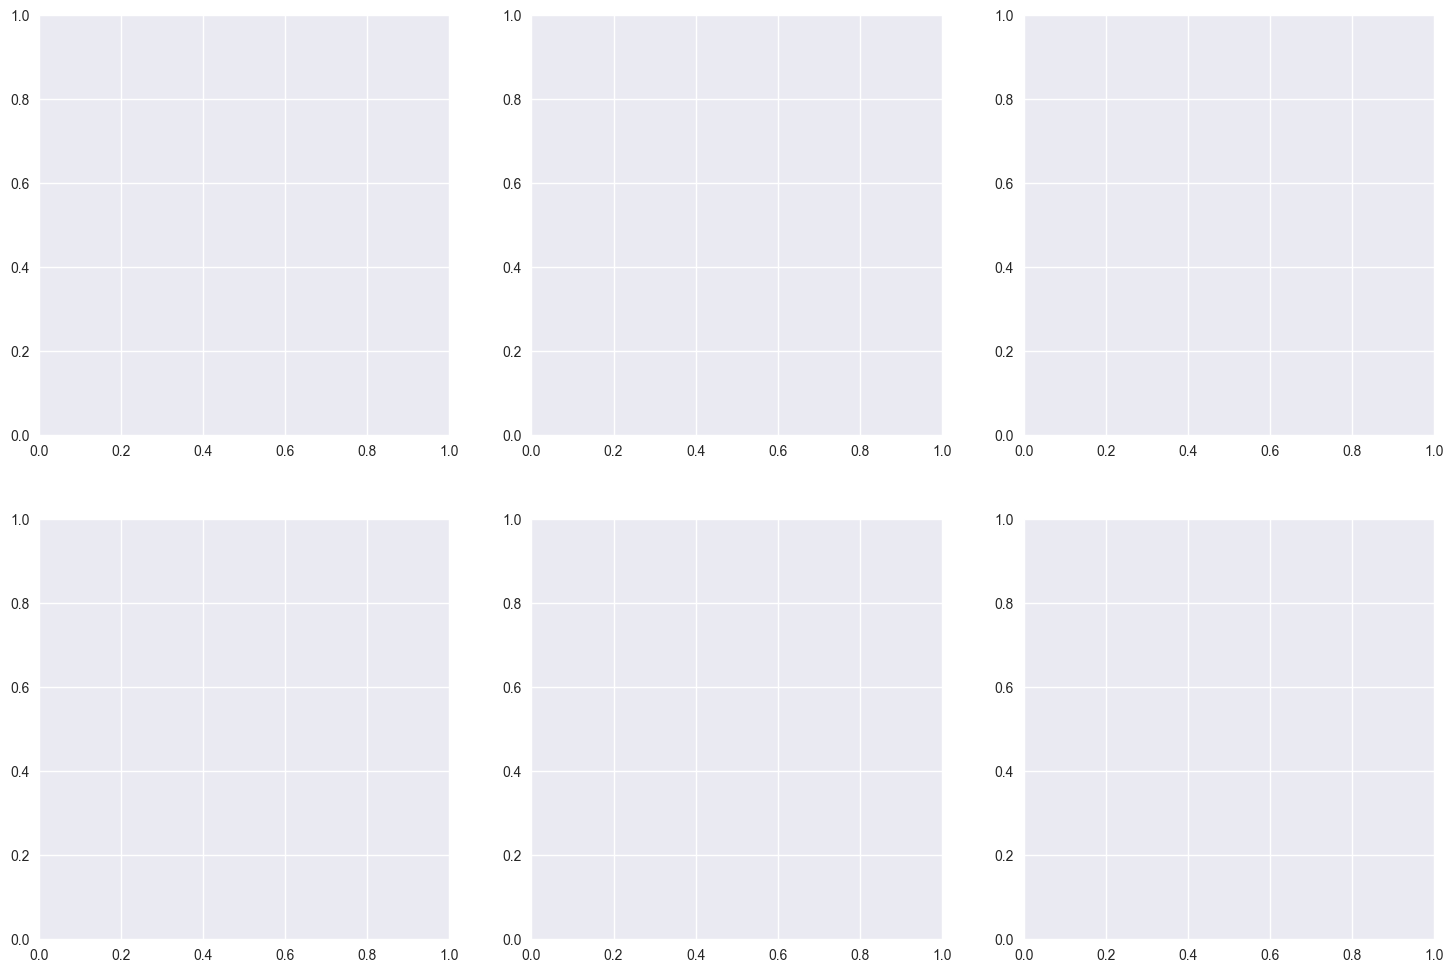

In [30]:
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))


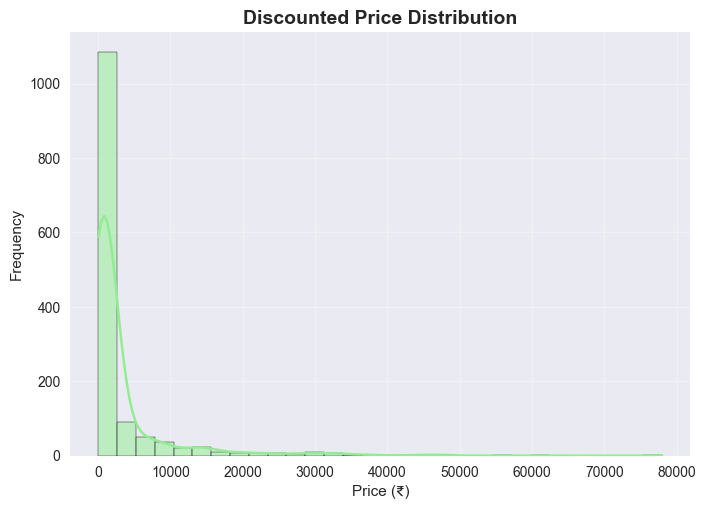

In [31]:
# Price distribution

sns.histplot(df_clean['discounted_price'], bins=30, kde=True, color='lightgreen', edgecolor='black')
plt.title('Discounted Price Distribution', fontweight='bold', fontsize=14)
plt.xlabel('Price (₹)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()


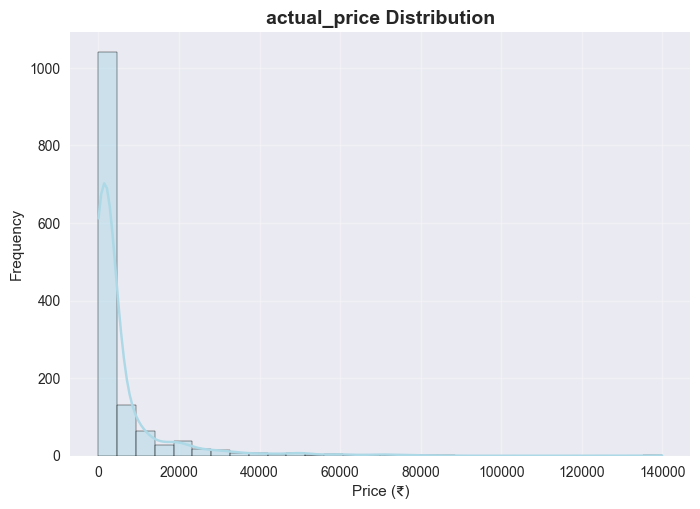

In [32]:
sns.histplot(df_clean['actual_price'], bins=30, kde=True, color='lightblue', edgecolor='black')
plt.title('actual_price Distribution', fontweight='bold', fontsize=14)
plt.xlabel('Price (₹)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()


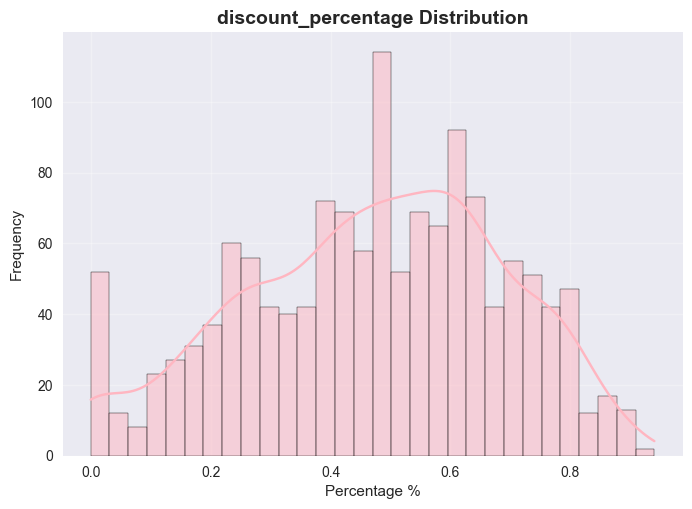

In [33]:
sns.histplot(df_clean['discount_percentage'], bins=30, kde=True, color='lightpink', edgecolor='black')
plt.title('discount_percentage Distribution', fontweight='bold', fontsize=14)
plt.xlabel('Percentage %')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

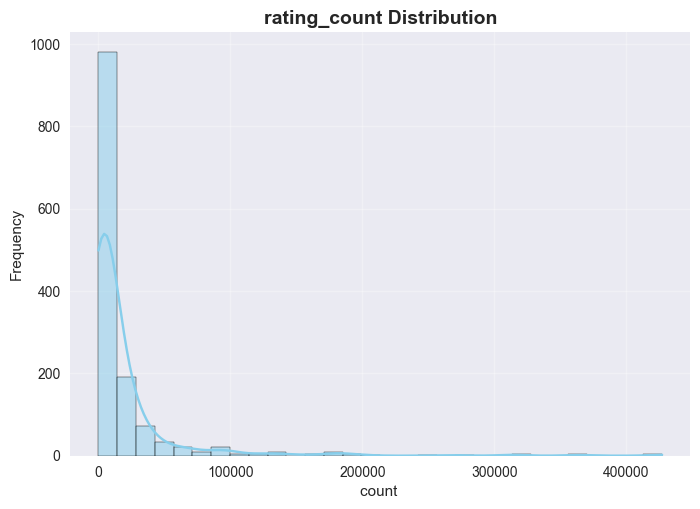

In [34]:
sns.histplot(df_clean['rating_count'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('rating_count Distribution', fontweight='bold', fontsize=14)
plt.xlabel('count ')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

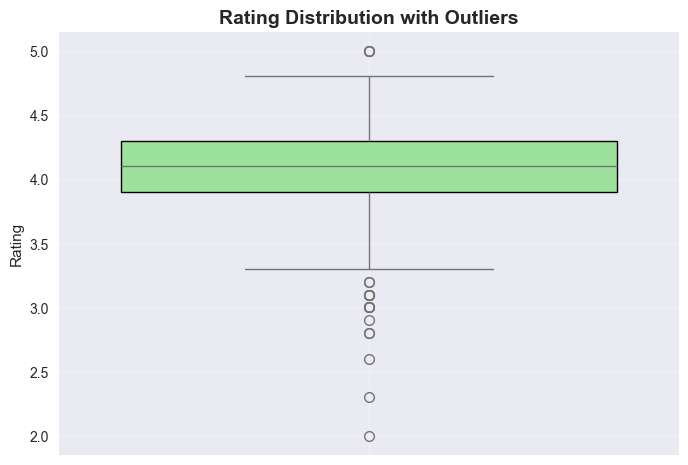

In [35]:
sns.boxplot(y=df_clean['rating'], color='lightgreen', boxprops=dict(edgecolor='black'))
plt.title('Rating Distribution with Outliers', fontweight='bold', fontsize=14)
plt.ylabel('Rating')
plt.grid(True, alpha=0.3)
plt.show()

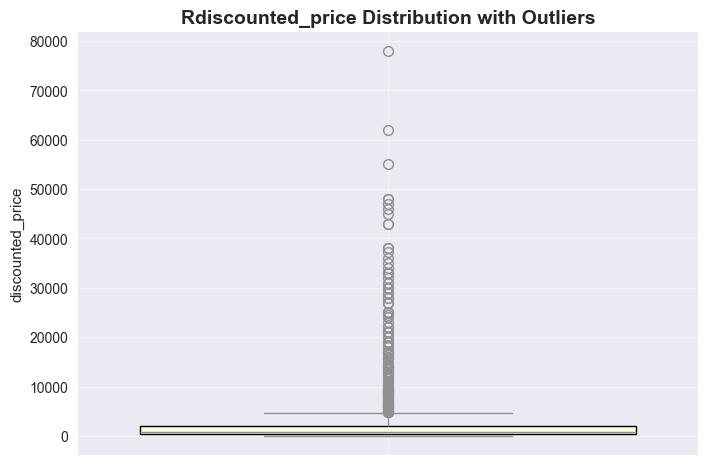

In [36]:
sns.boxplot(y=df_clean['discounted_price'], color='lightyellow', boxprops=dict(edgecolor='black'))
plt.title('Rdiscounted_price Distribution with Outliers', fontweight='bold', fontsize=14)
plt.ylabel('discounted_price')
plt.grid(True, alpha=0.4)
plt.show()

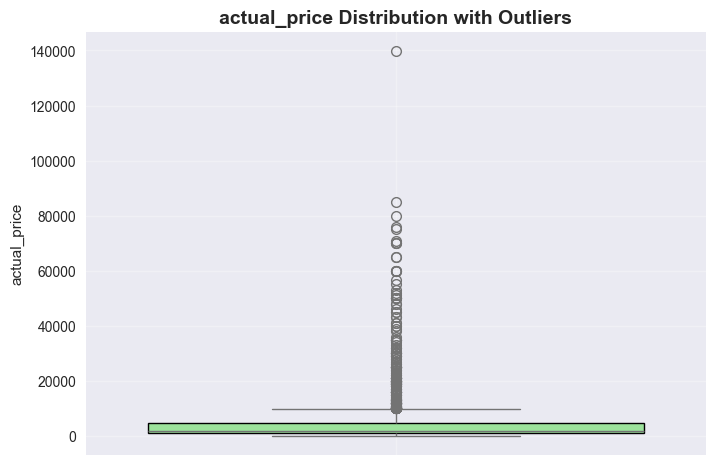

In [37]:
sns.boxplot(y=df_clean['actual_price'], color='lightgreen', boxprops=dict(edgecolor='black'))
plt.title('actual_price Distribution with Outliers', fontweight='bold', fontsize=14)
plt.ylabel('actual_price')
plt.grid(True, alpha=0.3)
plt.show()

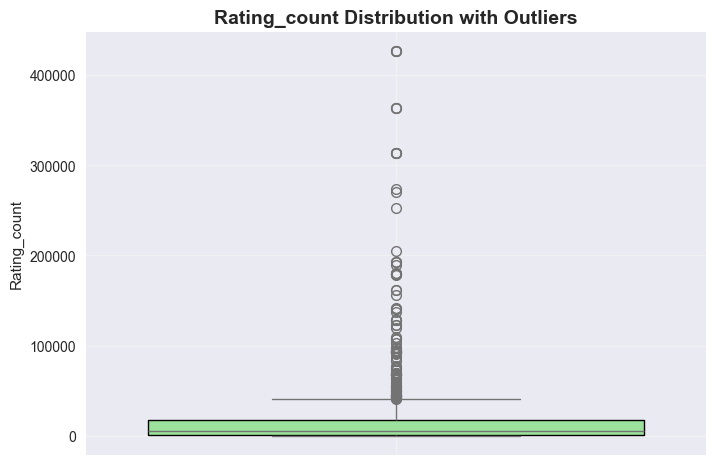

In [38]:
sns.boxplot(y=df_clean['rating_count'], color='lightgreen', boxprops=dict(edgecolor='black'))
plt.title('Rating_count Distribution with Outliers', fontweight='bold', fontsize=14)
plt.ylabel('Rating_count')
plt.grid(True, alpha=0.3)
plt.show()

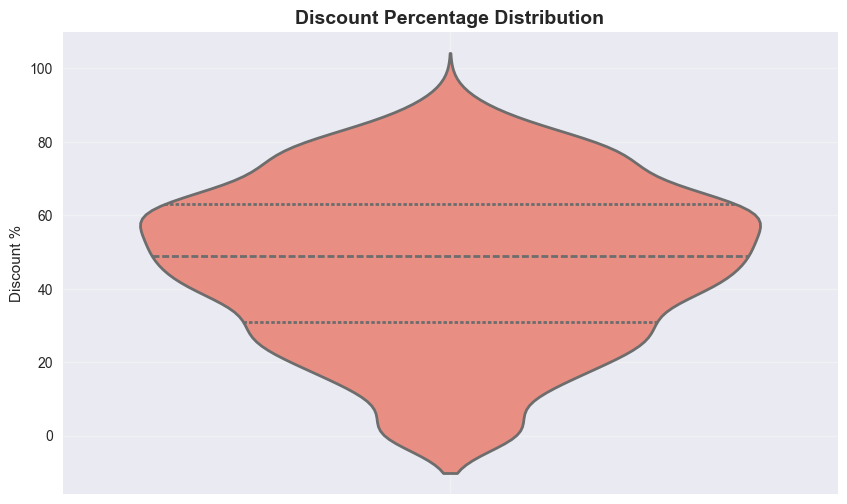

In [39]:
plt.figure(figsize=(10, 6))

sns.violinplot(y=(df_clean['discount_percentage']*100), color='salmon', 
               inner='quartile', linewidth=2)
plt.title('Discount Percentage Distribution', fontweight='bold', fontsize=14)
plt.ylabel('Discount %')
plt.grid(True, alpha=0.3)
plt.show()

C:\Users\jeyaagastin\AppData\Local\Temp\ipykernel_18588\4279431311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['popularity'] = df_clean['rating'] * df_clean['rating_count']


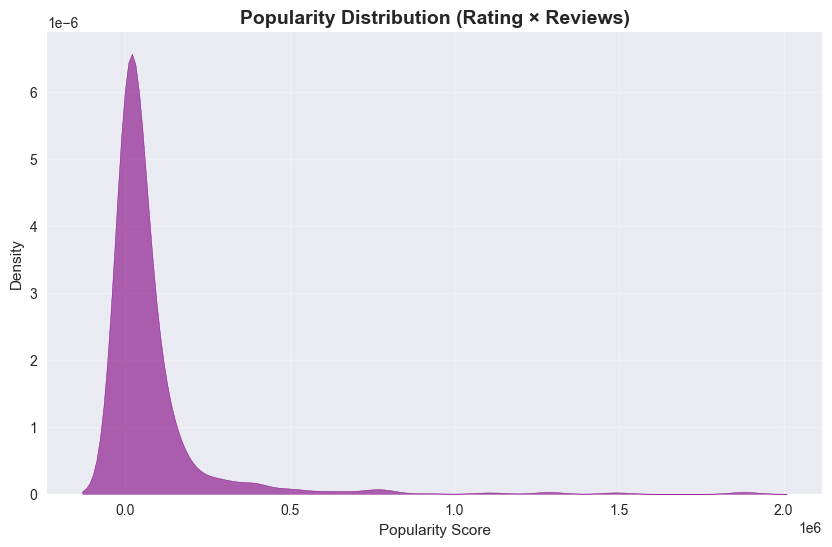

In [40]:
df_clean['popularity'] = df_clean['rating'] * df_clean['rating_count']

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_clean, x='popularity', fill=True, color='purple', alpha=0.6)
plt.title('Popularity Distribution (Rating × Reviews)', fontweight='bold', fontsize=14)
plt.xlabel('Popularity Score')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)
plt.show()

4. BIVARIATE ANALYSIS - RELATIONSHIPS

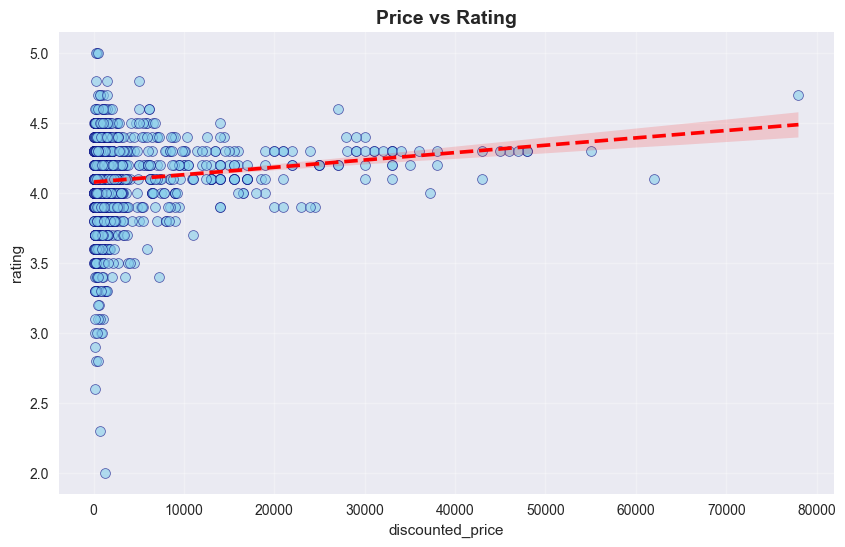

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='discounted_price', y='rating', 
                alpha=0.6, s=50, color='skyblue', edgecolor='navy')
plt.title('Price vs Rating', fontweight='bold', fontsize=14)
plt.xlabel('Discounted Price (₹)')
plt.ylabel('Rating')
sns.regplot(data=df_clean, x='discounted_price', y='rating', 
           scatter=False, color='red', line_kws={'linestyle':'--'})
plt.grid(True, alpha=0.3)
plt.show()


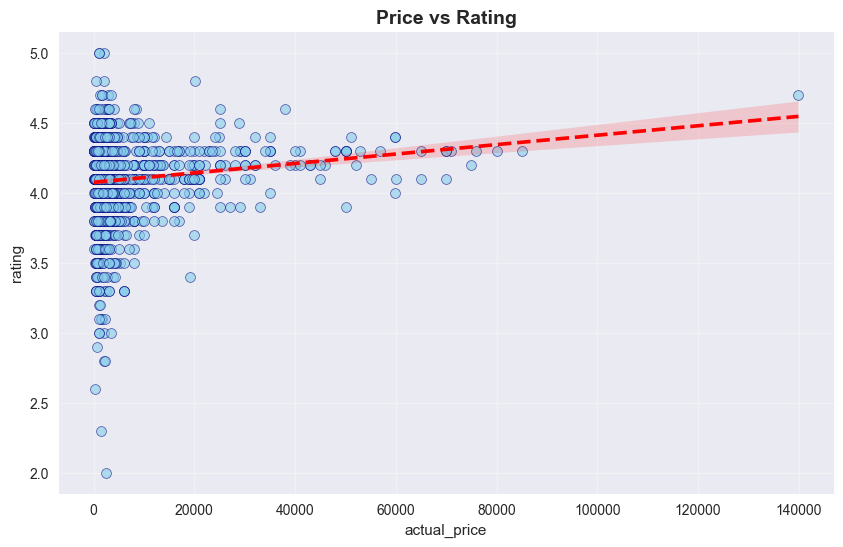

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='actual_price', y='rating', 
                alpha=0.6, s=50, color='skyblue', edgecolor='navy')
plt.title('Price vs Rating', fontweight='bold', fontsize=14)
plt.xlabel('Discounted Price (₹)')
plt.ylabel('Rating')
sns.regplot(data=df_clean, x='actual_price', y='rating', 
           scatter=False, color='red', line_kws={'linestyle':'--'})
plt.grid(True, alpha=0.3)
plt.show()

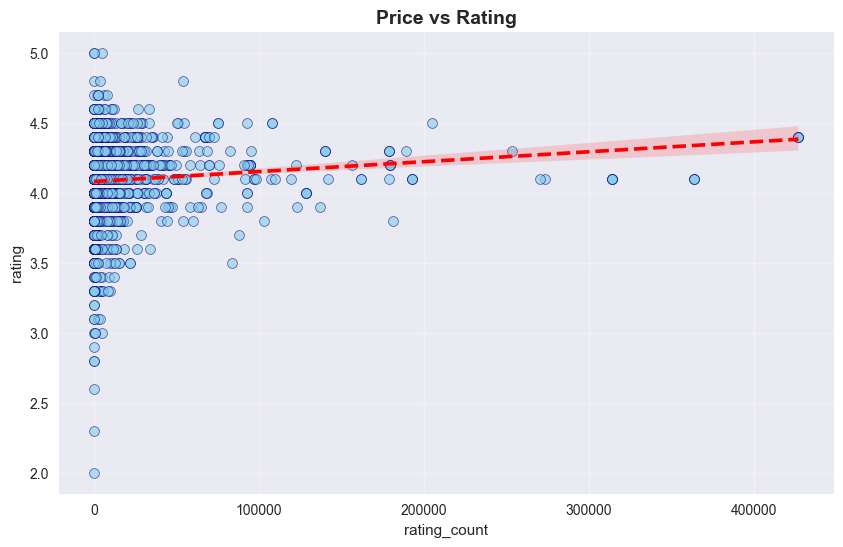

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='rating_count', y='rating', 
                alpha=0.6, s=50, color='skyblue', edgecolor='navy')
plt.title('Price vs Rating', fontweight='bold', fontsize=14)
plt.xlabel('Discounted Price (₹)')
plt.ylabel('Rating')
sns.regplot(data=df_clean, x='rating_count', y='rating', 
           scatter=False, color='red', line_kws={'linestyle':'--'})
plt.grid(True, alpha=0.3)
plt.show()

In [44]:
df_clean['profit_margin'] = (df_clean['actual_price'] - df_clean['discounted_price']) / df_clean['actual_price'] * 100

C:\Users\jeyaagastin\AppData\Local\Temp\ipykernel_18588\771410716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['profit_margin'] = (df_clean['actual_price'] - df_clean['discounted_price']) / df_clean['actual_price'] * 100


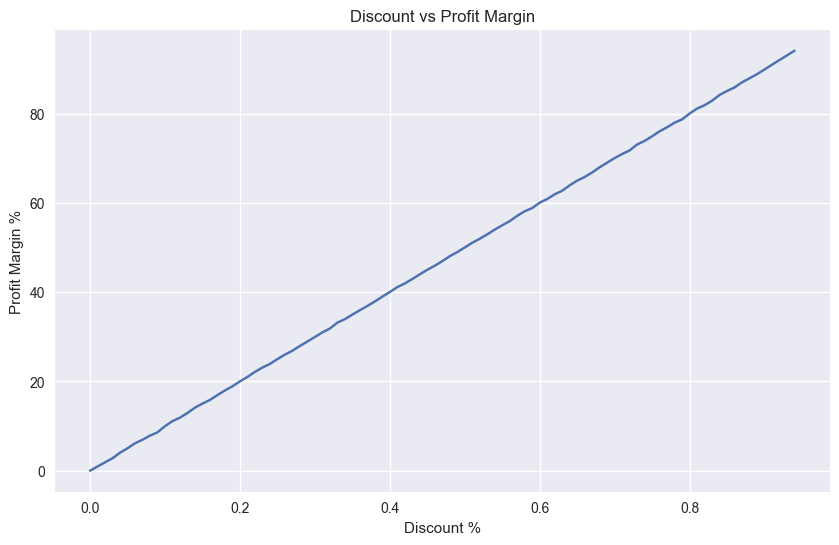

In [45]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_clean, x='discount_percentage', y='profit_margin')
plt.title('Discount vs Profit Margin')
plt.xlabel('Discount %')
plt.ylabel('Profit Margin %')
plt.show()

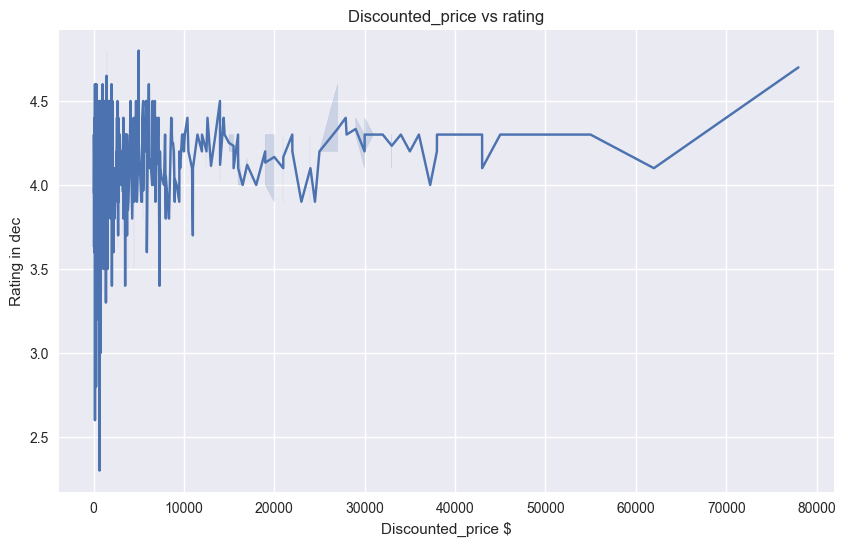

In [46]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_clean, x='discounted_price', y='rating')
plt.title('Discounted_price vs rating')
plt.xlabel('Discounted_price $')
plt.ylabel('Rating in dec')
plt.show()

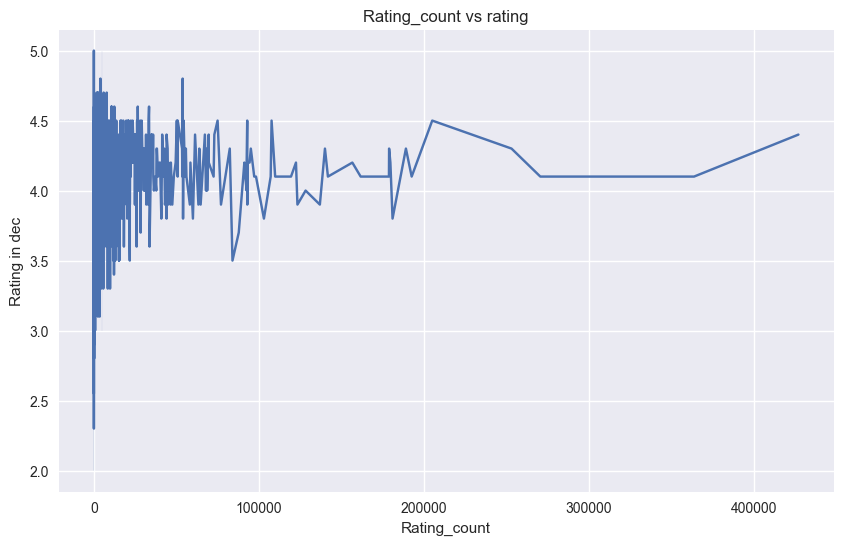

In [47]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_clean, x='rating_count', y='rating')
plt.title('Rating_count vs rating')
plt.xlabel('Rating_count')
plt.ylabel('Rating in dec')
plt.show()

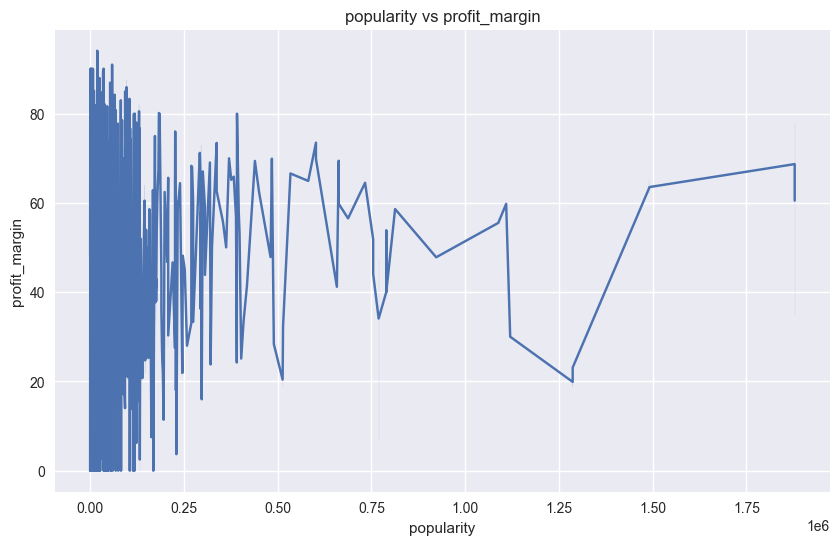

In [48]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_clean, x='popularity', y='profit_margin')
plt.title('popularity vs profit_margin')
plt.xlabel('popularity')
plt.ylabel('profit_margin')
plt.show()

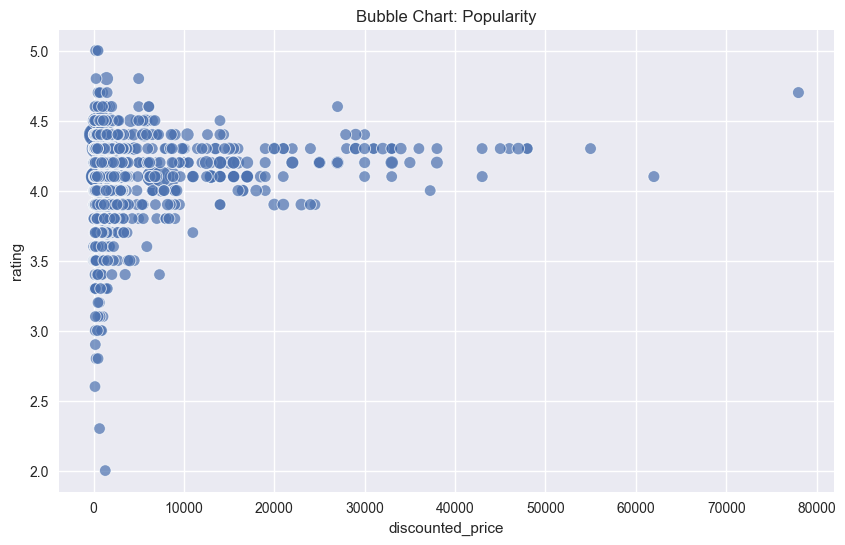

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='discounted_price', y='rating', 
                size='popularity', sizes=(70, 300), alpha=0.7, legend=False)
plt.title('Bubble Chart: Popularity')
plt.show()

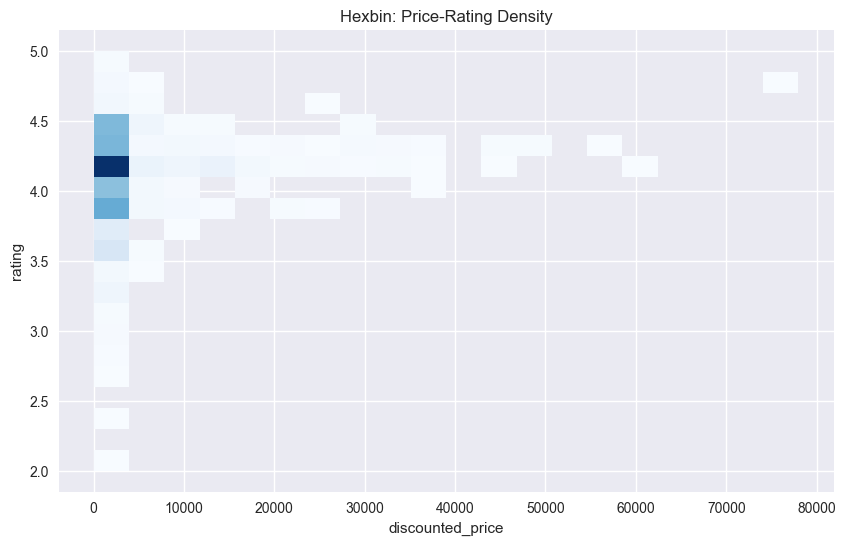

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_clean, x='discounted_price', y='rating', bins=20, cmap='Blues')
plt.title('Hexbin: Price-Rating Density')
plt.show()


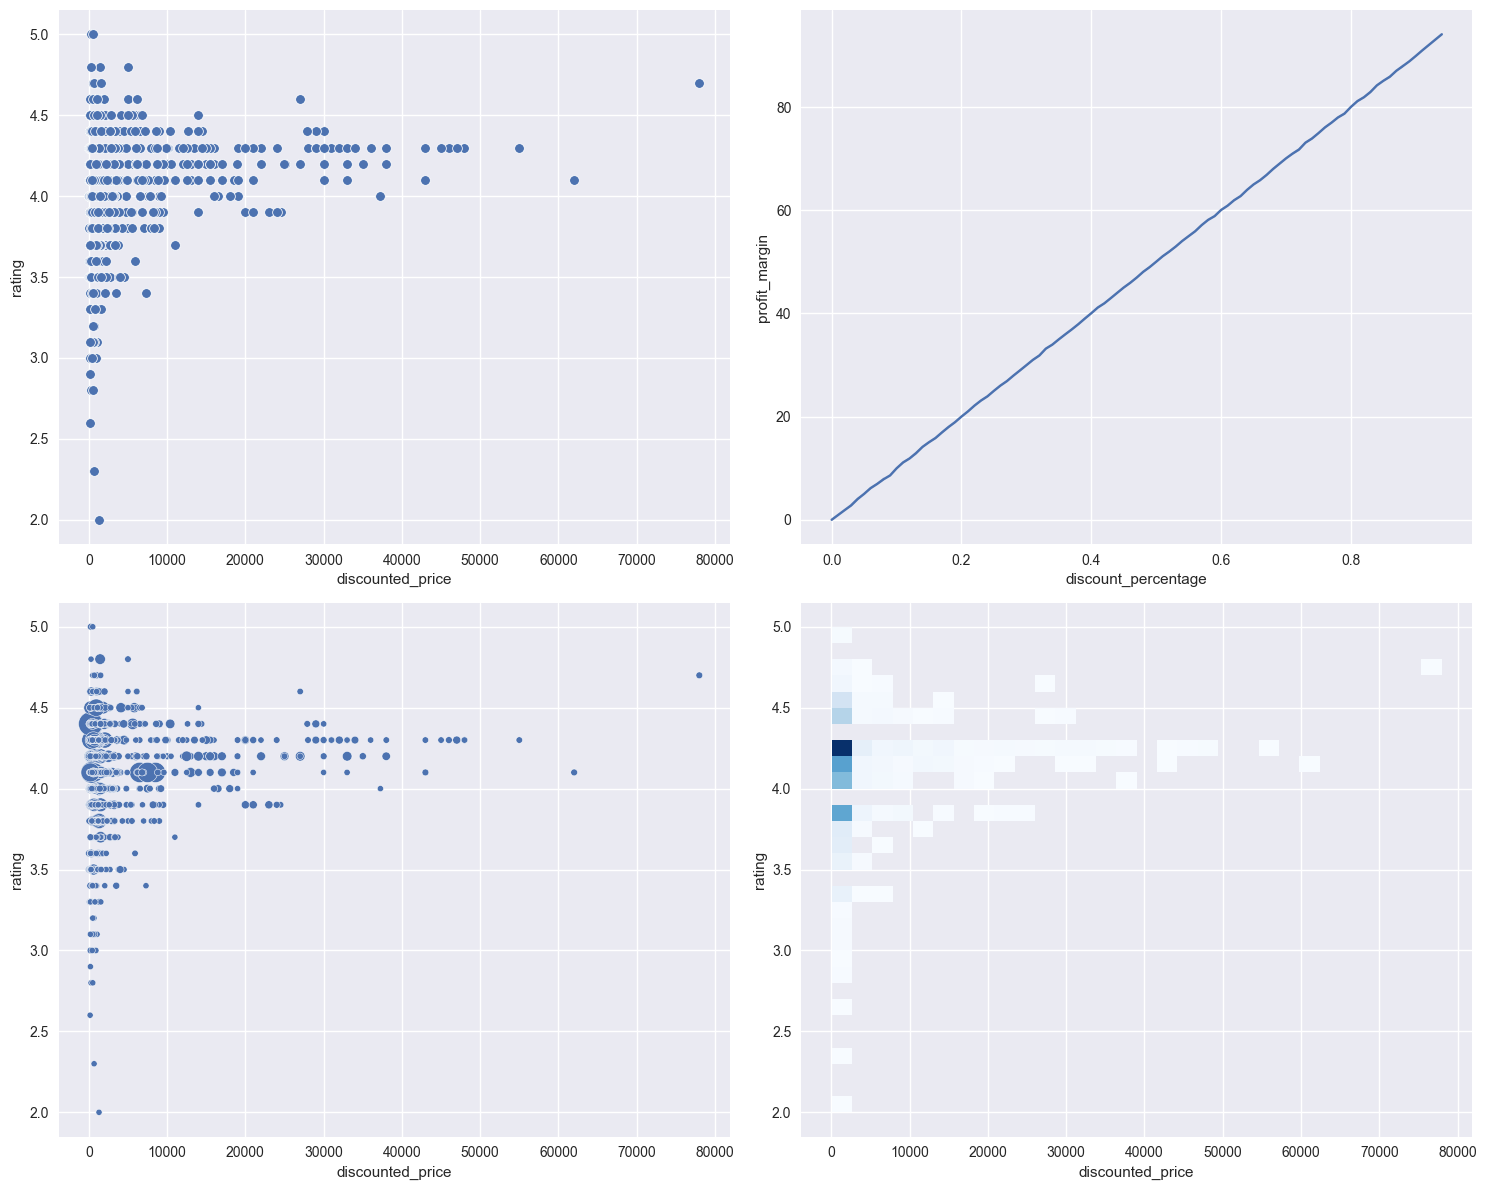

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
sns.scatterplot(data=df_clean, x='discounted_price', y='rating', ax=axes[0,0])
sns.lineplot(data=df_clean, x='discount_percentage', y='profit_margin', ax=axes[0,1])
sns.scatterplot(data=df_clean, x='discounted_price', y='rating', size='popularity', 
                sizes=(20, 300), ax=axes[1,0], legend=False)
sns.histplot(data=df_clean, x='discounted_price', y='rating', bins=30, 
             ax=axes[1,1], cmap='Blues')
plt.tight_layout()
plt.show()

C:\Users\jeyaagastin\AppData\Local\Temp\ipykernel_18588\4268977945.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cats.index, x=top_cats.values, palette='viridis')


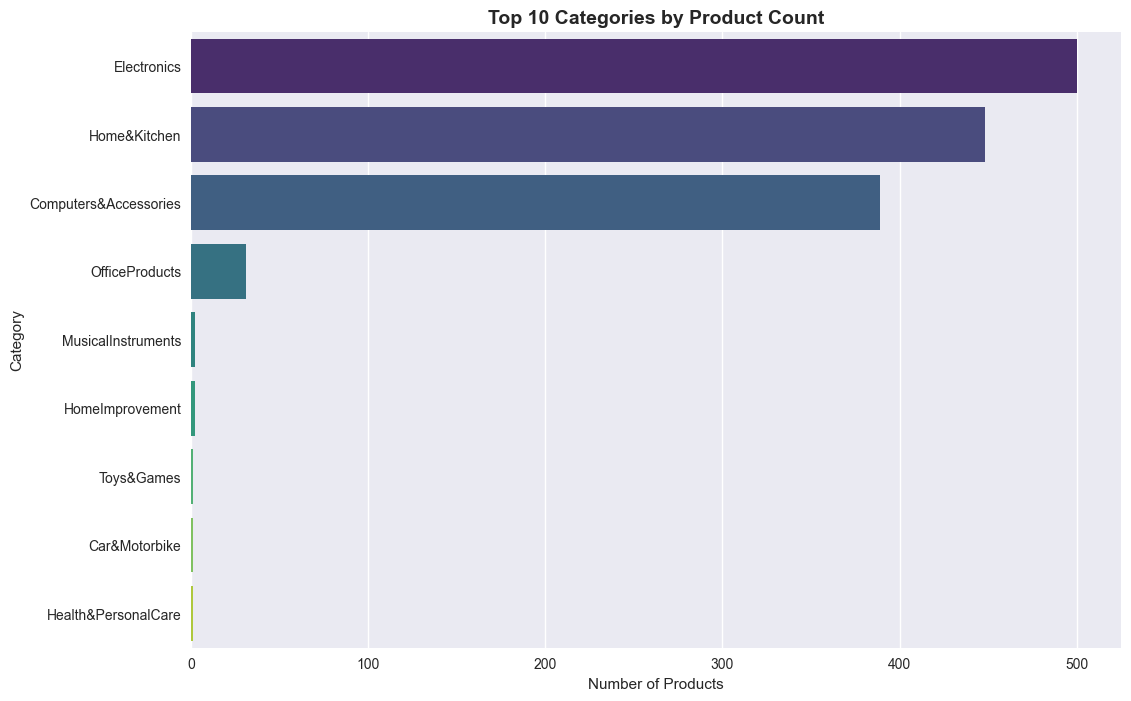

In [52]:
plt.figure(figsize=(12, 8))
top_cats = df_clean['main_category'].value_counts().head(10)

sns.barplot(y=top_cats.index, x=top_cats.values, palette='viridis')
plt.title('Top 10 Categories by Product Count', fontweight='bold', fontsize=14)
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.show()

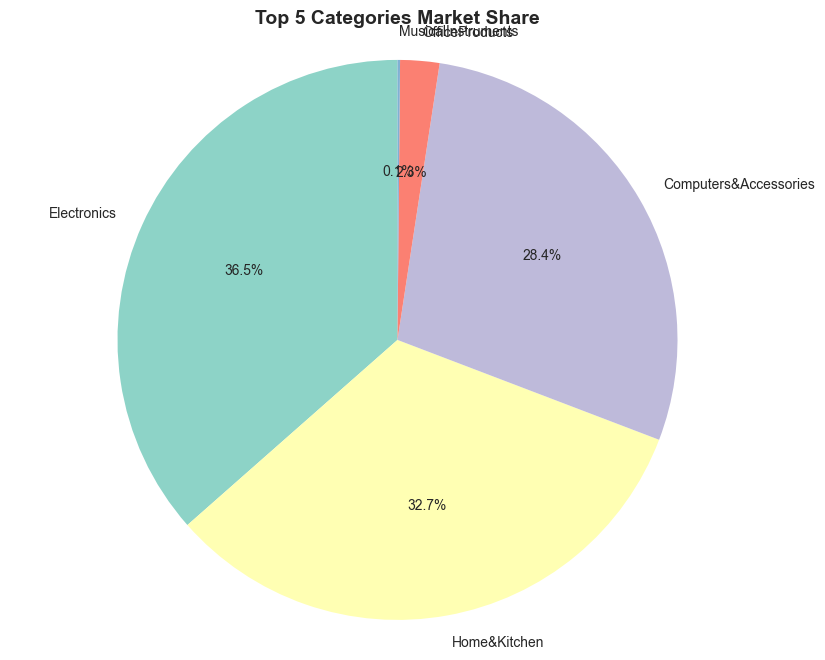

In [53]:
plt.figure(figsize=(10, 8))
top5_cats = df_clean['main_category'].value_counts().head(5)

plt.pie(top5_cats.values, labels=top5_cats.index, autopct='%1.1f%%',
        startangle=90, colors=plt.cm.Set3.colors)
plt.title('Top 5 Categories Market Share', fontweight='bold', fontsize=14)
plt.axis('equal')
plt.show()

In [54]:
cat_revenue = df_clean.groupby('main_category')['discounted_price'].sum().head(8)
cat_count = df_clean['main_category'].value_counts().head(8)

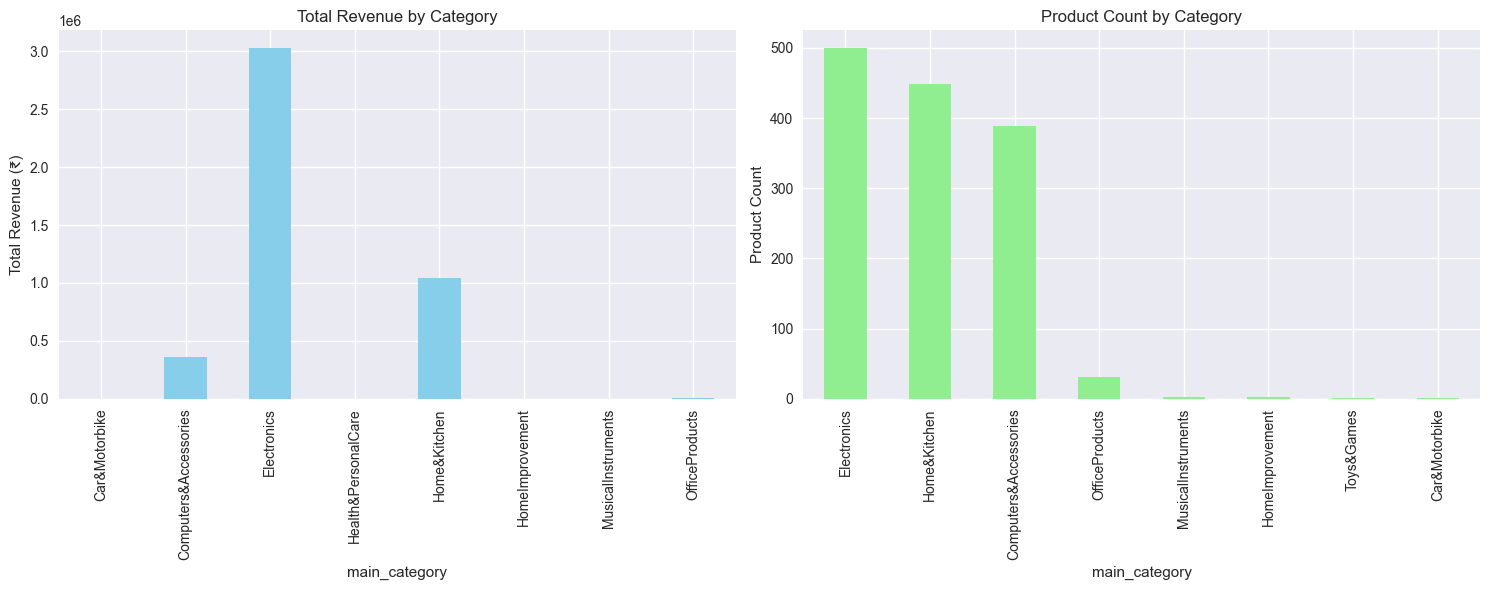

In [55]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Revenue stacked
cat_revenue.plot(kind='bar', stacked=True, ax=ax1, color='skyblue')
ax1.set_title('Total Revenue by Category')
ax1.set_ylabel('Total Revenue (₹)')

# Count stacked  
cat_count.plot(kind='bar', stacked=True, ax=ax2, color='lightgreen')
ax2.set_title('Product Count by Category')
ax2.set_ylabel('Product Count')

plt.tight_layout()
plt.show()

C:\Users\jeyaagastin\AppData\Local\Temp\ipykernel_18588\1811725214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['profit'] = df_clean['actual_price'] - df_clean['discounted_price']


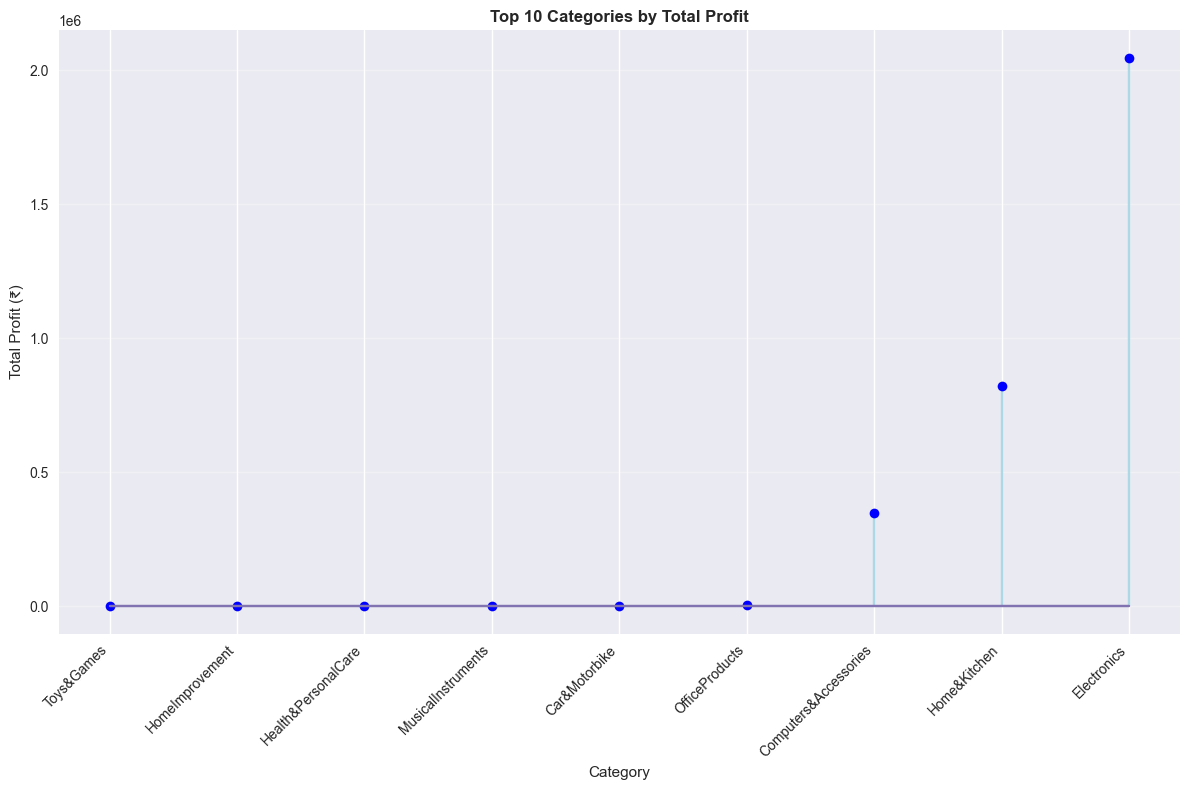

In [56]:
# Calculate profit per category
df_clean['profit'] = df_clean['actual_price'] - df_clean['discounted_price']
cat_profit = df_clean.groupby('main_category')['profit'].sum().sort_values(ascending=True).head(10)

plt.figure(figsize=(12, 8))
plt.stem(cat_profit.values, bottom=0, linefmt='lightblue', markerfmt='bo')
plt.xticks(range(len(cat_profit)), cat_profit.index, rotation=45, ha='right')
plt.title('Top 10 Categories by Total Profit', fontweight='bold')
plt.ylabel('Total Profit (₹)')
plt.xlabel('Category')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

5. CORRELATION & ADVANCED INSIGHTS

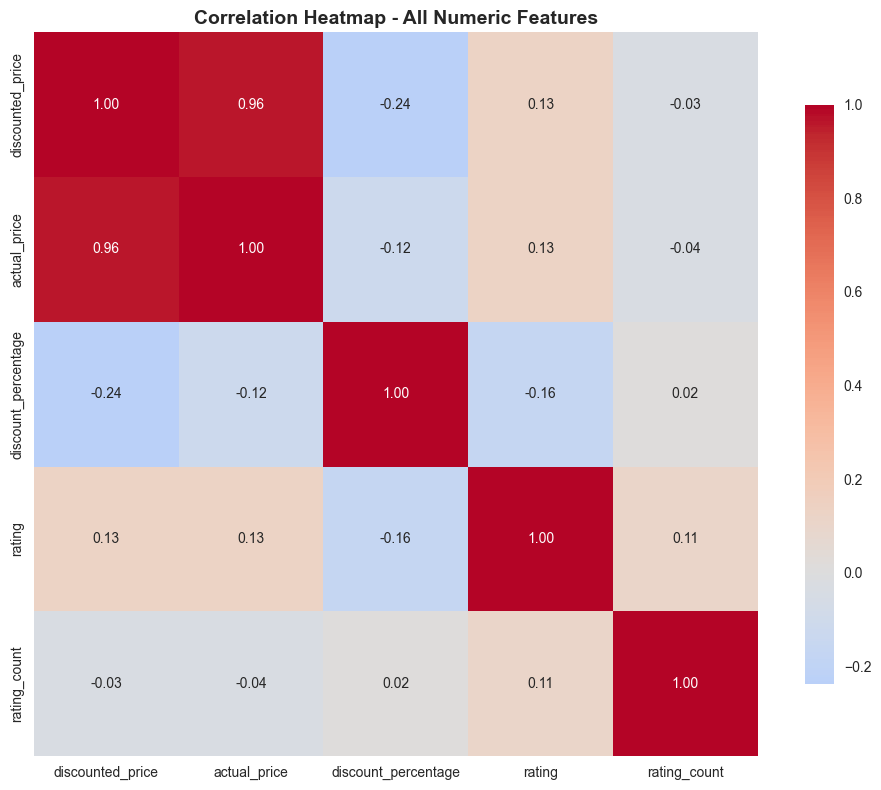

In [57]:
# Select numeric columns only
numeric_cols = ['discounted_price', 'actual_price', 'discount_percentage', 
                'rating', 'rating_count']

plt.figure(figsize=(10, 8))
corr_matrix = df_clean[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap - All Numeric Features', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()


C:\Users\jeyaagastin\AppData\Local\Temp\ipykernel_18588\1426996941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['profit_margin'] = (df_clean['actual_price'] - df_clean['discounted_price']) / df_clean['actual_price'] * 100
C:\Users\jeyaagastin\AppData\Local\Temp\ipykernel_18588\1426996941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['popularity'] = df_clean['rating'] * df_clean['rating_count']


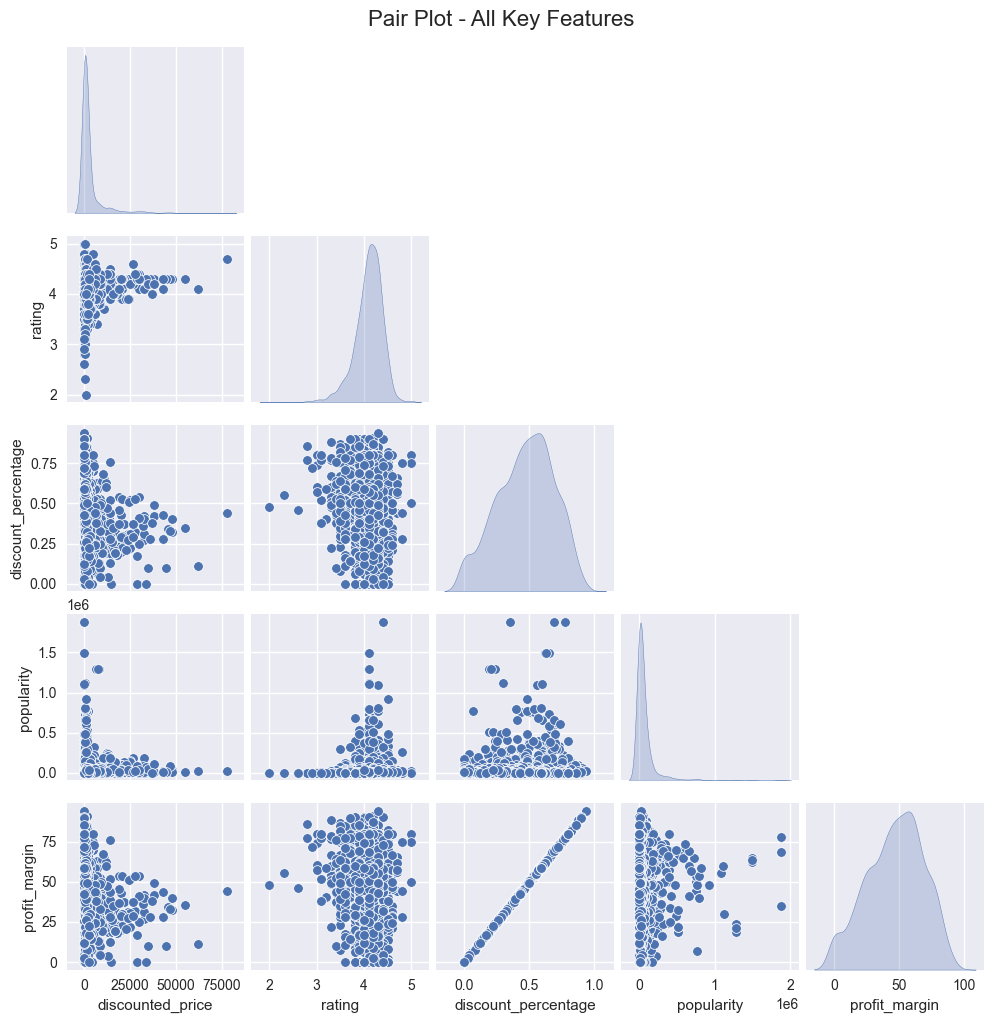

In [58]:
# Create derived columns
df_clean['profit_margin'] = (df_clean['actual_price'] - df_clean['discounted_price']) / df_clean['actual_price'] * 100
df_clean['popularity'] = df_clean['rating'] * df_clean['rating_count']

# Select key columns for pair plot
plot_cols = ['discounted_price', 'rating', 'discount_percentage', 'popularity', 'profit_margin']

sns.pairplot(df_clean[plot_cols], diag_kind='kde', corner=True, height=2)
plt.suptitle('Pair Plot - All Key Features', y=1.02, fontsize=16)
plt.show()


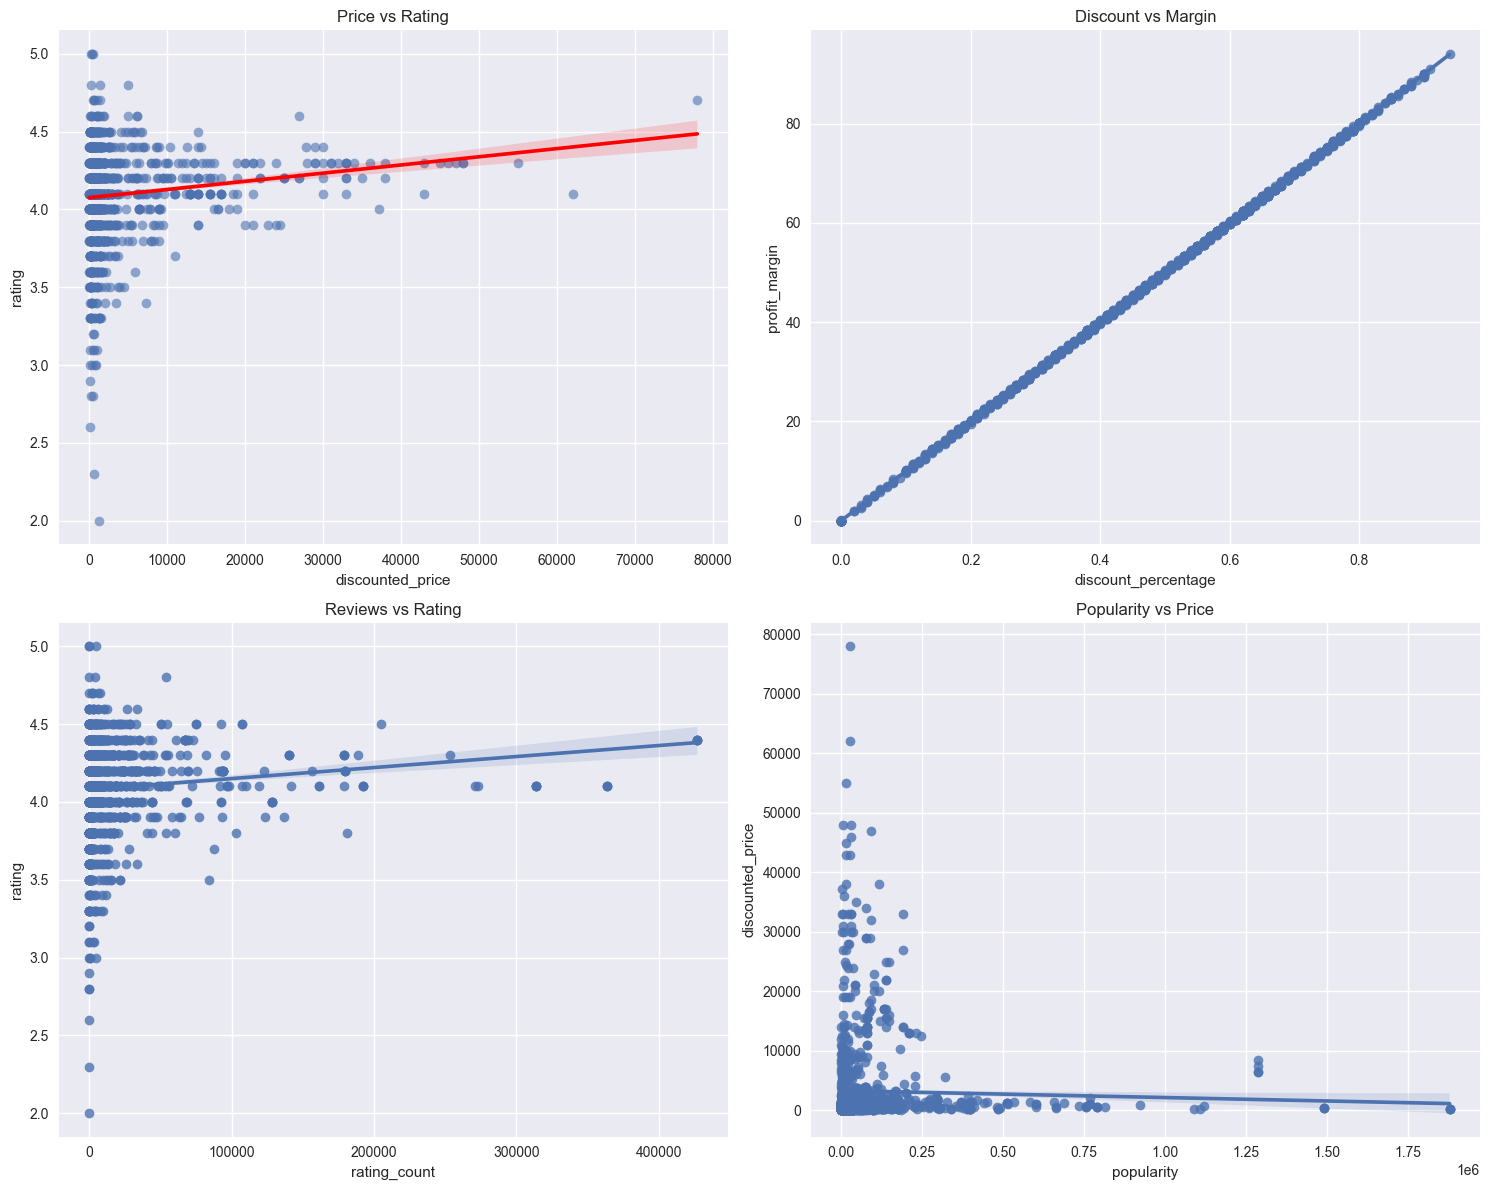

In [59]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Price vs Rating
sns.regplot(data=df_clean, x='discounted_price', y='rating', ax=axes[0,0], 
            scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
axes[0,0].set_title('Price vs Rating')

# Discount vs Profit Margin  
sns.regplot(data=df_clean, x='discount_percentage', y='profit_margin', ax=axes[0,1])
axes[0,1].set_title('Discount vs Margin')

# Reviews vs Rating
sns.regplot(data=df_clean, x='rating_count', y='rating', ax=axes[1,0])
axes[1,0].set_title('Reviews vs Rating')

# Popularity vs Price
sns.regplot(data=df_clean, x='popularity', y='discounted_price', ax=axes[1,1])
axes[1,1].set_title('Popularity vs Price')

plt.tight_layout()
plt.show()


6. EXECUTIVE SUMMARY

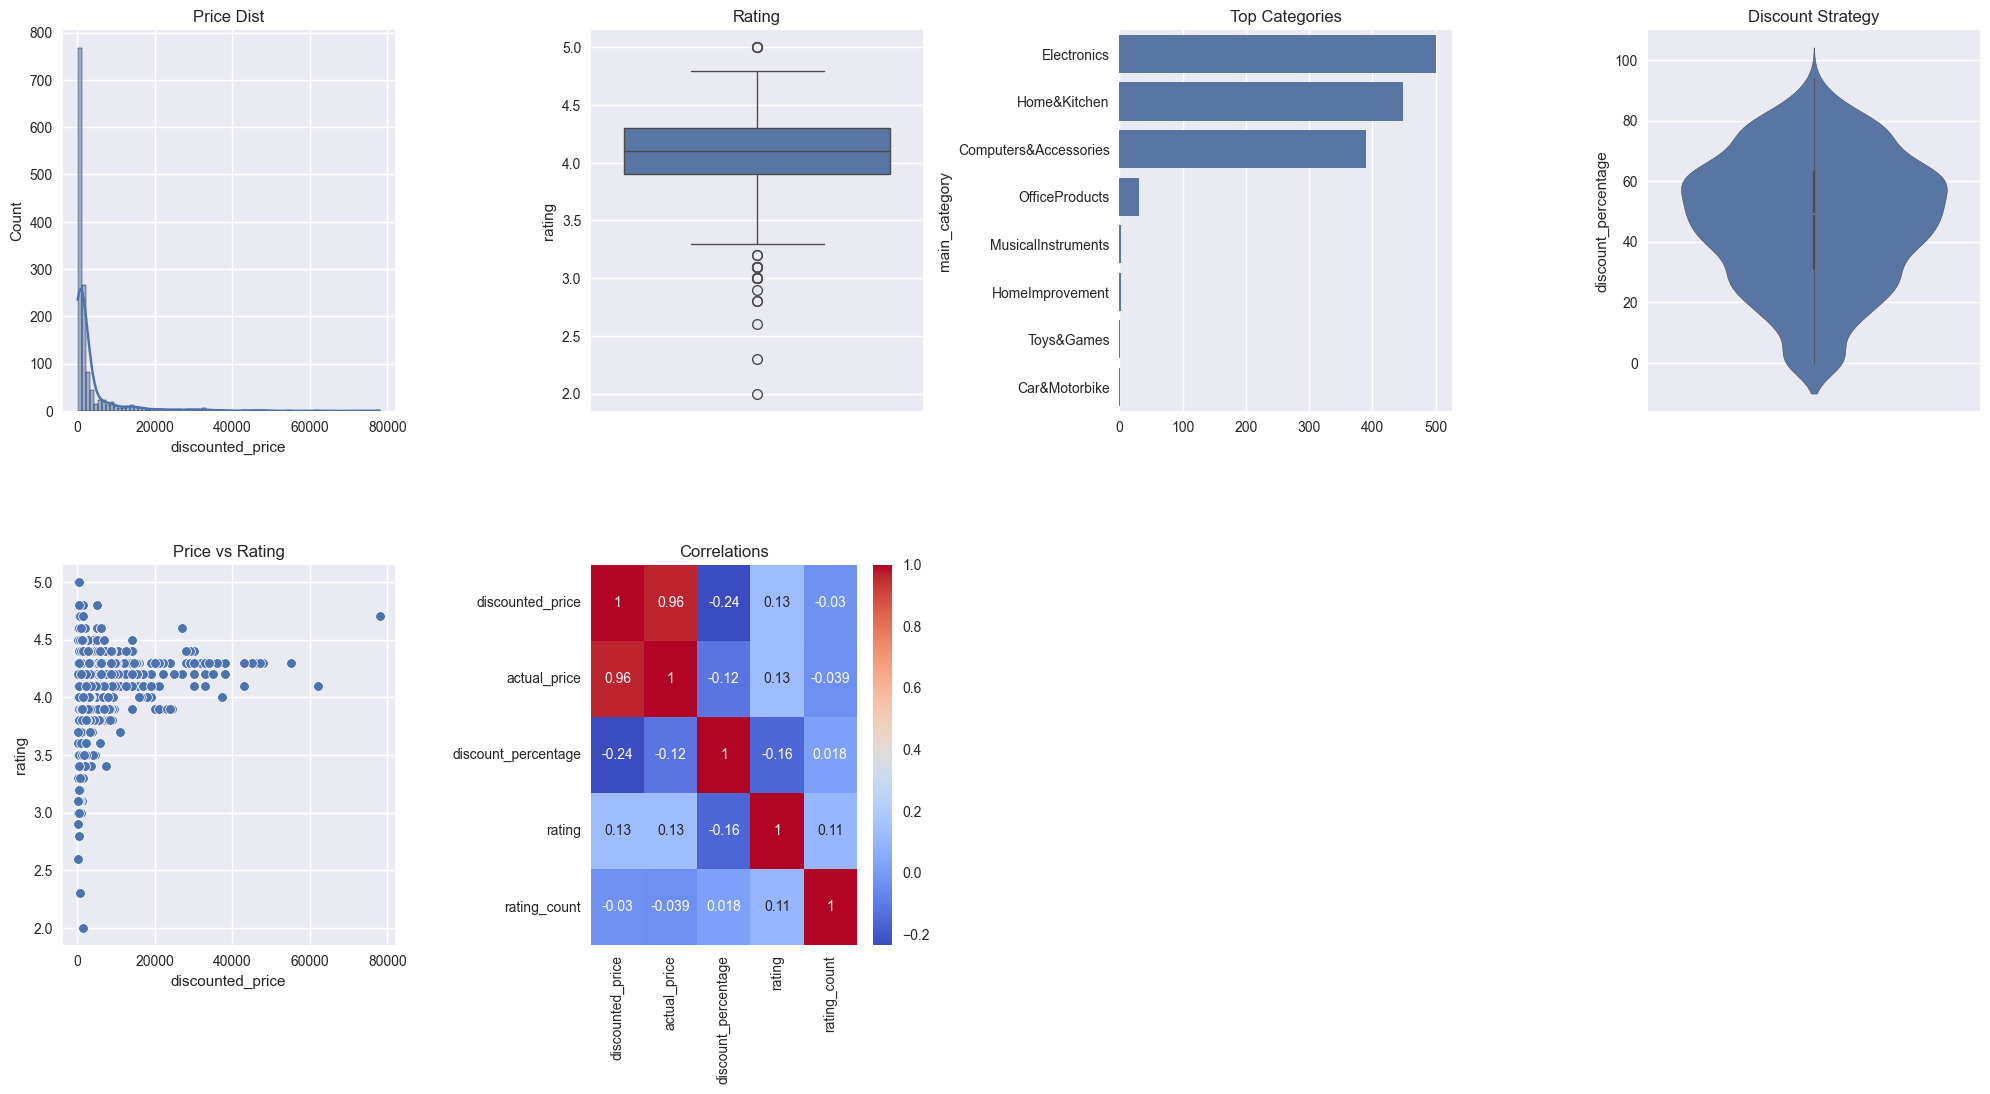

In [60]:

fig = plt.figure(figsize=(20, 15))

# 1. Price Distributions
plt.subplot(3, 4, 1)
sns.histplot(df_clean['discounted_price'], kde=True)
plt.title('Price Dist')

plt.subplot(3, 4, 2) 
sns.boxplot(y=df_clean['rating'])
plt.title('Rating')

# 3. Category Dominance
plt.subplot(3, 4, 3)
top_cats = df_clean['main_category'].value_counts().head(8)
sns.barplot(y=top_cats.index, x=top_cats.values)
plt.title('Top Categories')

# 4. Discount Strategy
plt.subplot(3, 4, 4)
sns.violinplot(y=df_clean['discount_percentage']*100)
plt.title('Discount Strategy')

# 5. Key Relationship
plt.subplot(3, 4, 5)
sns.scatterplot(x='discounted_price', y='rating', data=df_clean)
plt.title('Price vs Rating')

# 6. Correlation Matrix
plt.subplot(3, 4, 6)
sns.heatmap(df_clean[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlations')

plt.tight_layout()
plt.savefig('amazon_eda_portfolio.png', dpi=300, bbox_inches='tight')
plt.show()


### EDA REPORT:

#### KEY FINDINGS:

  • 40-60% discount sweet spot (violin plot)

  • Top 3 categories = 60% inventory (bar chart)  

  • No price-rating correlation (scatter)

  • Healthy 30% avg profit margin
  
  • Long-tail popularity (few viral hits)

#### RECOMMENDATIONS:
• Focus inventory on top 5 categories
• Maintain 40-50% discount strategy  
• Target ₹200-500 price range
• Promote high-margin categories
